# **Installments, Imports, Data Loading, Data Pre-processing**

In [ ]:
#Packages Installment
!pip install tensorflow
!pip install keras
!pip install visualkeras

In [ ]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Load the Dataset "Fashion-MNIST"
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
#Data Pre-processing
num_classes = 10
input_shape = (28, 28)

# Pixels Normalization
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Image Flattening
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)

# One hot Converting of labels
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [ ]:
#Creating train,test and validation data
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.25)

# **Data Visualization**

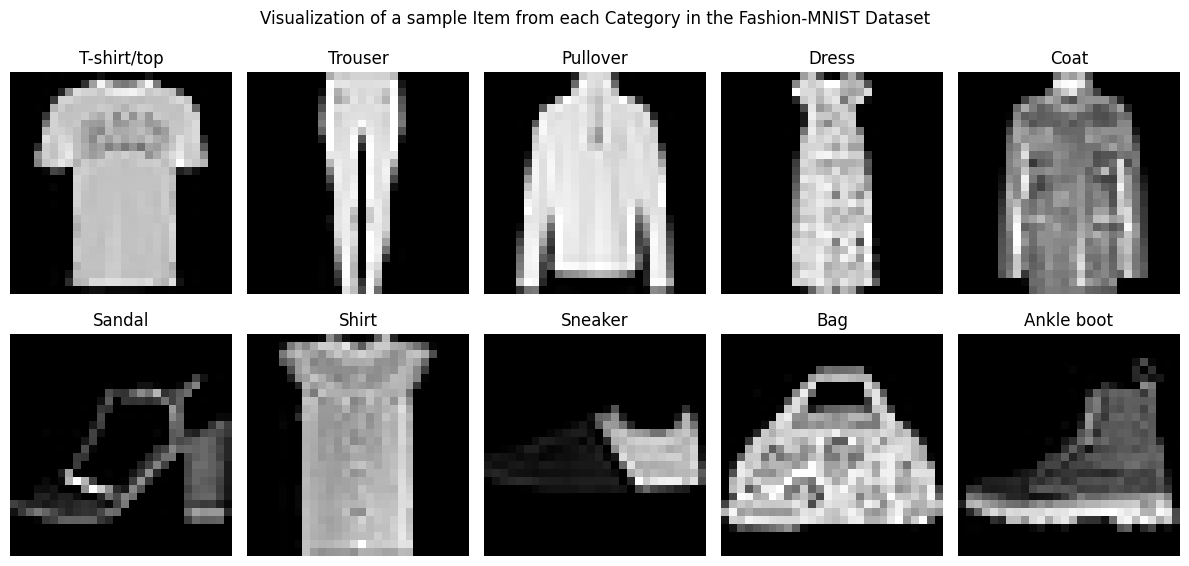

In [ ]:
#Dataset Visualization
import numpy as np
import matplotlib.pyplot as plt

# Define the fashion item categories
fashion_categories = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Select one image per category
sample_images = []
sample_labels = []

for category in fashion_categories.keys():
    category_images = train_images[train_labels[:, category] == 1]
    sample_index = np.random.randint(0, category_images.shape[0])
    sample_image = category_images[sample_index]
    sample_images.append(sample_image)
    sample_labels.append(fashion_categories[category])

# Plot the sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(len(sample_images)):
    sample_image = sample_images[i].reshape(28, 28)  # Reshape to (28, 28)
    axes[i].imshow(sample_image, cmap='gist_yarg_r')
    axes[i].set_title(sample_labels[i])
    axes[i].axis('off')

plt.suptitle("Visualization of a sample Item from each Category in the Fashion-MNIST Dataset")
plt.tight_layout()
plt.show()

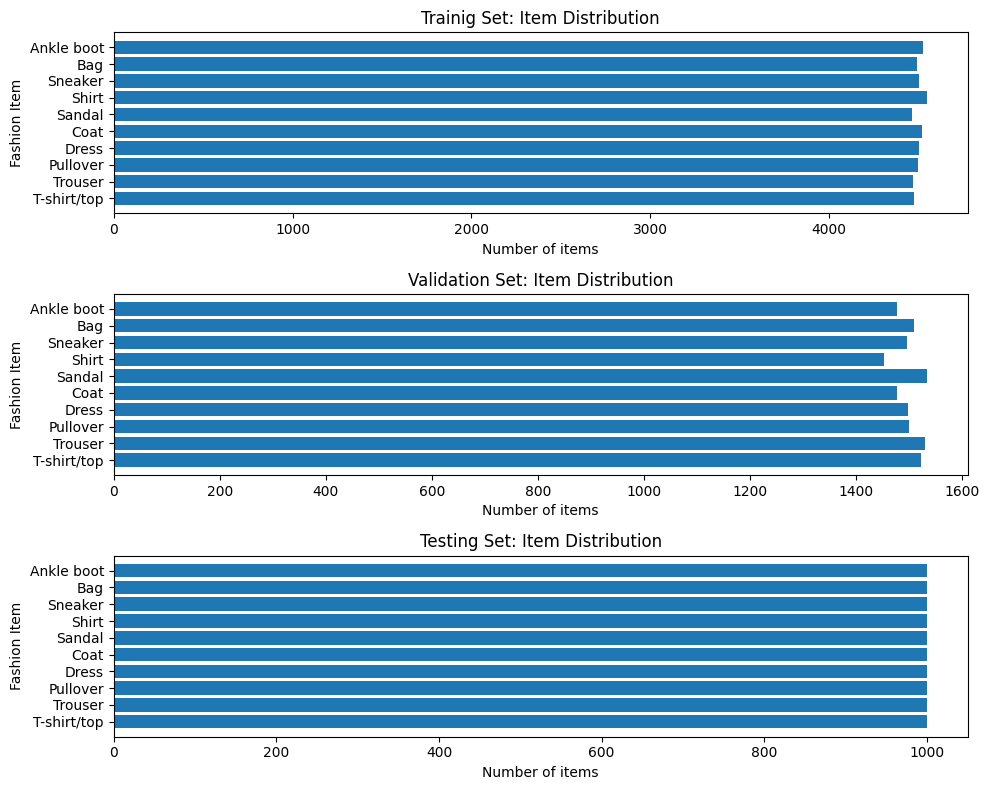

In [ ]:
#Visualization of Itme Distribution in Training - Validation - Test Dataset

# Count of the training set's  items per category
train_category_counts = np.sum(y_train, axis=0)

# Count of the training set's  items per category
validation_category_counts = np.sum(y_val, axis=0)

# Count of the testing set's  items per category
test_category_counts = np.sum(test_labels, axis=0)

# Horizontal bar plots for both sets
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
axes[0].barh(list(fashion_categories.values()), train_category_counts)
axes[0].set_xlabel("Number of items")
axes[0].set_ylabel("Fashion Item")
axes[0].set_title("Trainig Set: Item Distribution")

axes[1].barh(list(fashion_categories.values()), validation_category_counts)
axes[1].set_xlabel("Number of items")
axes[1].set_ylabel("Fashion Item")
axes[1].set_title("Validation Set: Item Distribution")

axes[2].barh(list(fashion_categories.values()), test_category_counts)
axes[2].set_xlabel("Number of items")
axes[2].set_ylabel("Fashion Item")
axes[2].set_title("Testing Set: Item Distribution")


plt.tight_layout()
plt.show()

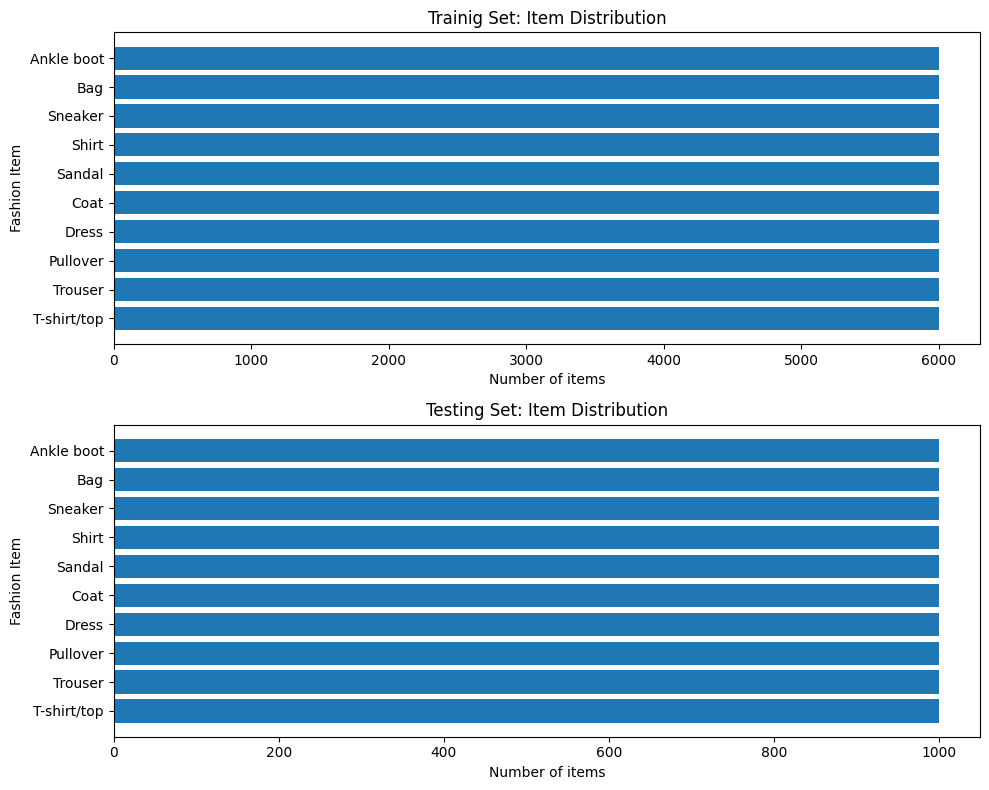

In [ ]:
#Visualization of Itme Distribution in Training-Test Dataset

# Count of the training set's  items per category
train_category_counts = np.sum(train_labels, axis=0)

# Count of the testing set's  items per category
test_category_counts = np.sum(test_labels, axis=0)

# Horizontal bar plots for both sets
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
axes[0].barh(list(fashion_categories.values()), train_category_counts)
axes[0].set_xlabel("Number of items")
axes[0].set_ylabel("Fashion Item")
axes[0].set_title("Trainig Set: Item Distribution")

axes[1].barh(list(fashion_categories.values()), test_category_counts)
axes[1].set_xlabel("Number of items")
axes[1].set_ylabel("Fashion Item")
axes[1].set_title("Testing Set: Item Distribution")

plt.tight_layout()
plt.show()

# **Basic MLP Creation 1**

In [ ]:
# Build the MLP model
mlp_model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(28 * 28,)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(num_classes, activation="softmax")
])

mlp_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
mlp_model.summary()

# Train the MLP model
history=mlp_model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_val, y_val)) #X_train, X_val, y_train, y_val

# Evaluate the MLP model
mlp_loss,mlp_accuracy = mlp_model.evaluate(test_images, test_labels, verbose=0)
print("MLP Accuracy:", mlp_accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
352/352 [==============================] - 8s 5ms/step - loss: 0.5759 - accuracy: 0.8013 - val_loss: 0.4390 - val_accuracy: 0.8442
Epoch 2/20
352/352 [==============================] - 1s 4ms/step - loss: 0.4116 - accuracy: 0.8544 - val_loss: 0.4010 - val_accuracy: 0.8571
Epoch 3/20
352/352 [==========

313/313 [==============================] - 1s 2ms/step


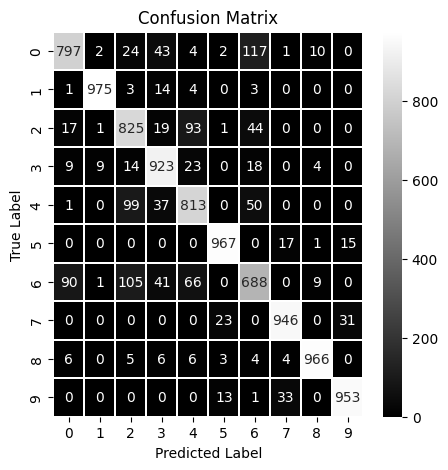

In [ ]:
#Confusion Matrix

# Predict classes for the test images
y_pred = mlp_model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

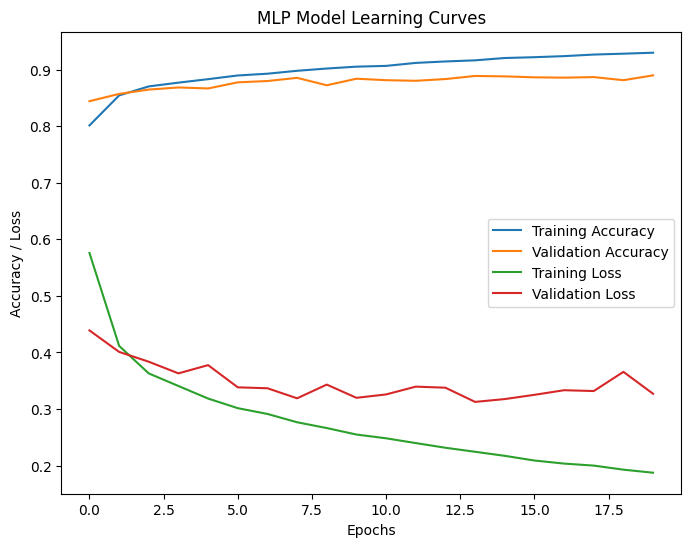

In [ ]:
# Plot the learning curves
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

# **Basic MLP Creation 2**

In [ ]:
# Build the MLP model
mlp_model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(28 * 28,)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(num_classes, activation="softmax")
])

mlp_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["categorical_accuracy"])
mlp_model.summary()

# Train the MLP model
history=mlp_model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_val, y_val)) #X_train, X_val, y_train, y_val

# Evaluate the MLP model
mlp_loss,mlp_categorical_accuracy = mlp_model.evaluate(test_images, test_labels, verbose=0)
print("MLP categorical Accuracy:", mlp_categorical_accuracy)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
352/352 [==============================] - 3s 5ms/step - loss: 0.5793 - categorical_accuracy: 0.7988 - val_loss: 0.4639 - val_categorical_accuracy: 0.8377
Epoch 2/20
352/352 [==============================] - 1s 4ms/step - loss: 0.4098 - categorical_accuracy: 0.8531 - val_loss: 0.4175 - val_categoric

313/313 [==============================] - 1s 2ms/step


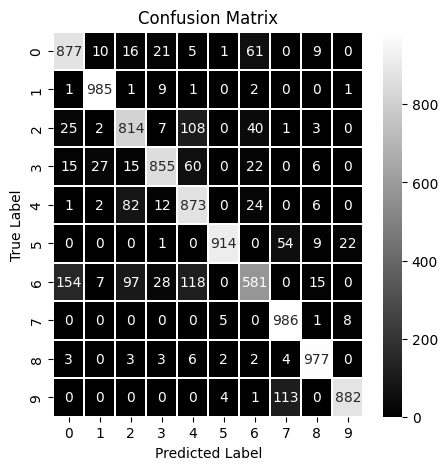

In [ ]:
#Confusion Matrix

# Predict classes for the test images
y_pred = mlp_model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

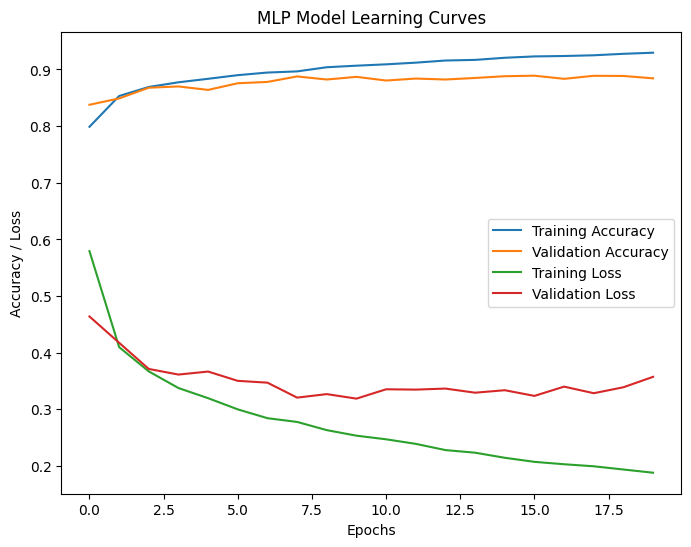

In [ ]:
# Plot the learning curves
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

# **MLP Optimization 1**

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping

# Define a function to create the MLP model
def create_mlp_model(optimizer='adam', hidden_units=128, dropout_rate=0.2):
    mlp_model = keras.Sequential([
        keras.layers.Dense(hidden_units, activation="relu", input_shape=(28 * 28,)),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(hidden_units, activation="relu"),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(num_classes, activation="softmax")
    ])

    mlp_model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    return mlp_model

# Create a KerasClassifier wrapper for the MLP model
mlp_model_wrapper = KerasClassifier(build_fn=create_mlp_model, verbose=1)

# Define the hyperparameters for random search
param_grid = {
    'hidden_units': [64, 128],
    'dropout_rate': [0.2, 0.3],
    'batch_size': [128],
    'epochs': [20],
    'optimizer': ['adam', 'sgd']
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=mlp_model_wrapper, param_grid=param_grid, cv=3, verbose=1)
grid_result = grid_search.fit(X_train, y_train, validation_data=(X_val, y_val),
                              callbacks=[EarlyStopping(patience=3)])

# Print the best parameters and accuracy
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

<ipython-input-15-16b7361a1012>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  mlp_model_wrapper = KerasClassifier(build_fn=create_mlp_model, verbose=1)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Epoch 1/20
235/235 [==============================] - 3s 6ms/step - loss: 0.9474 - accuracy: 0.6634 - val_loss: 0.5306 - val_accuracy: 0.8180
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.5648 - accuracy: 0.7973 - val_loss: 0.4616 - val_accuracy: 0.8368
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.4961 - accuracy: 0.8237 - val_loss: 0.4208 - val_accuracy: 0.8483
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.4596 - accuracy: 0.8342 - val_loss: 0.3994 - val_accuracy: 0.8585
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.4387 - accuracy: 0.8424 - val_loss: 0.3967 - val_accuracy: 0.8550
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.4188 - accuracy: 0.8513 - val_loss: 0.4222 - val_accuracy: 0.8480
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.4064 - accur

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3009 - accuracy: 0.8879 - val_loss: 0.3298 - val_accuracy: 0.8804
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2928 - accuracy: 0.8915 - val_loss: 0.3403 - val_accuracy: 0.8792
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2857 - accuracy: 0.8927 - val_loss: 0.3480 - val_accuracy: 0.8762
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2786 - accuracy: 0.8970 - val_loss: 0.3388 - val_accuracy: 0.8801
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2736 - accuracy: 0.8994 - val_loss: 0.3271 - val_accuracy: 0.8836
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2712 - accuracy: 0.8971 - val_loss: 0.3256 - val_accuracy: 0.8846
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2625 - accuracy: 0.9013 - val_loss: 0.3324 - val_accuracy: 0.8827
Epoch 

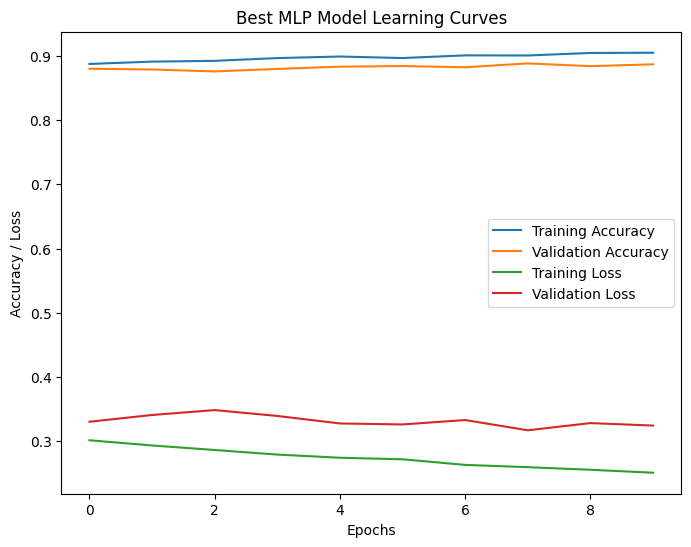

In [ ]:
# Get the best MLP model
best_mlp_model = grid_result.best_estimator_.model

# Train the best MLP model
history = best_mlp_model.fit(train_images, train_labels, batch_size=128, epochs=10, verbose=1, validation_data=(test_images, test_labels))

# Evaluate the best MLP model
mlp_loss, mlp_accuracy = best_mlp_model.evaluate(test_images, test_labels, verbose=0)
print("MLP Accuracy:", mlp_accuracy)

# Plot the learning curves of the best MLP model
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Best MLP Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


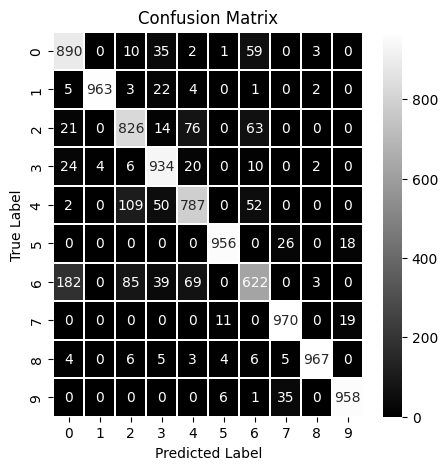

In [ ]:
#Confusion Matrix

# Predict classes for the test images
y_pred = best_mlp_model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **MLP Optimization 2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split

# Load the Fashion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names for the Fashion-MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoding
num_classes = len(class_names)
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)


#Creating train,test and validation data
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.25)



# Define the MLP model
def create_mlp_model(optimizer='adam'):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])
    return model

# Define the parameter grid for grid search
param_grid = {
    #'hidden_units': [64, 128],
    #'dropout_rate': [0.2, 0.3],
    'batch_size': [128],
    'epochs': [10,20],
    'optimizer': ['adam', 'sgd']
}

# Create a KerasClassifier
mlp_model = KerasClassifier(build_fn=create_mlp_model, epochs=10, batch_size=128, verbose=1)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search_result = grid_search.fit(X_train, np.argmax(y_train, axis=1)) #X_train, X_val, y_train, y_val

# Print the best parameters and score
print("Best Parameters: ", grid_search_result.best_params_)
print("Best Score: ", grid_search_result.best_score_)

<ipython-input-18-f4291bdecb0a>:51: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  mlp_model = KerasClassifier(build_fn=create_mlp_model, epochs=10, batch_size=128, verbose=1)


Epoch 1/10
235/235 [==============================] - 4s 5ms/step - loss: 0.6330 - categorical_accuracy: 0.7859
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.4519 - categorical_accuracy: 0.8410
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.4092 - categorical_accuracy: 0.8575
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.3822 - categorical_accuracy: 0.8655
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.3556 - categorical_accuracy: 0.8744
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.3421 - categorical_accuracy: 0.8796
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3250 - categorical_accuracy: 0.8847
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3118 - categorical_accuracy: 0.8899
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3035 - categorical_accuracy:

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2282 - categorical_accuracy: 0.9168 - val_loss: 0.2651 - val_categorical_accuracy: 0.9030
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2186 - categorical_accuracy: 0.9202 - val_loss: 0.2513 - val_categorical_accuracy: 0.9059
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2119 - categorical_accuracy: 0.9217 - val_loss: 0.2372 - val_categorical_accuracy: 0.9123
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2086 - categorical_accuracy: 0.9231 - val_loss: 0.2304 - val_categorical_accuracy: 0.9145
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1993 - categorical_accuracy: 0.9269 - val_loss: 0.2148 - val_categorical_accuracy: 0.9190
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1948 - categorical_accuracy: 0.9278 - val_loss: 0.2167 - val_categorical_accuracy: 0.9193
Epoc

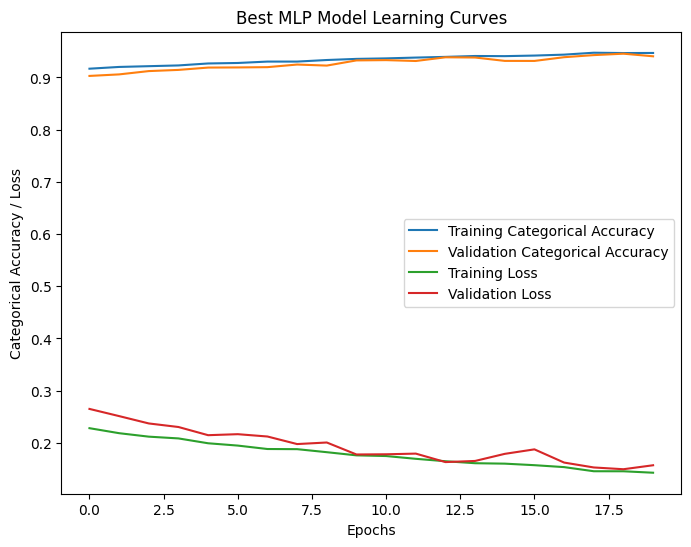

In [ ]:
# Get the best MLP model
best_mlp_model = grid_search_result.best_estimator_.model

# Train the best MLP model
history = best_mlp_model.fit(train_images, train_labels, batch_size=128, epochs=20, verbose=1, validation_data=(X_val, y_val))

# Evaluate the best MLP model
mlp_loss, mlp_categorical_accuracy = best_mlp_model.evaluate(test_images, test_labels, verbose=0)
print("MLP Categorical Accuracy:", mlp_categorical_accuracy)

# Plot the learning curves of the best MLP model
plt.figure(figsize=(8, 6))
plt.plot(history.history['categorical_accuracy'], label='Training Categorical Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Categorical Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Best MLP Model Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Categorical Accuracy / Loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


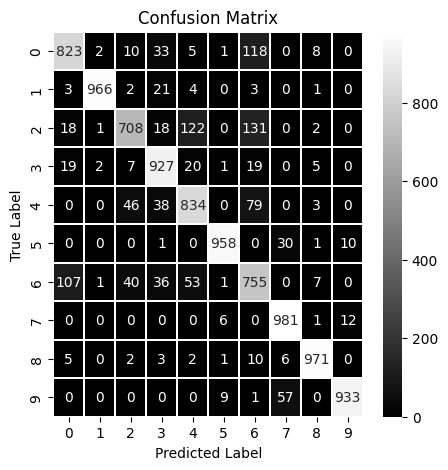

In [ ]:
#Confusion Matrix

# Predict classes for the test images
y_pred = best_mlp_model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()